In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/raw/Metro_Interstate_Traffic_Volume.csv")
print(df.head())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0     NaN  288.28      0.0      0.0          40       Clouds   
1     NaN  289.36      0.0      0.0          75       Clouds   
2     NaN  289.58      0.0      0.0          90       Clouds   
3     NaN  290.13      0.0      0.0          90       Clouds   
4     NaN  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  


In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt 

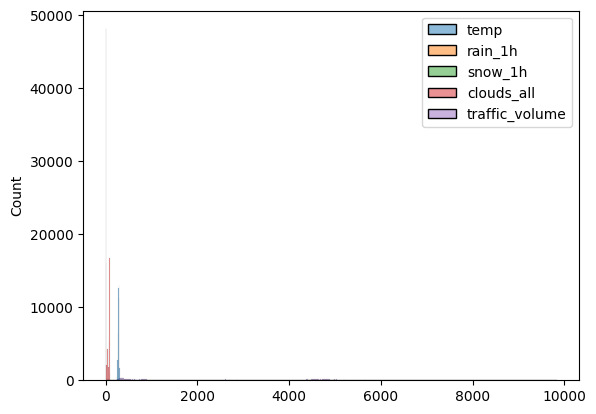

In [5]:
sns.histplot(df)
plt.show()

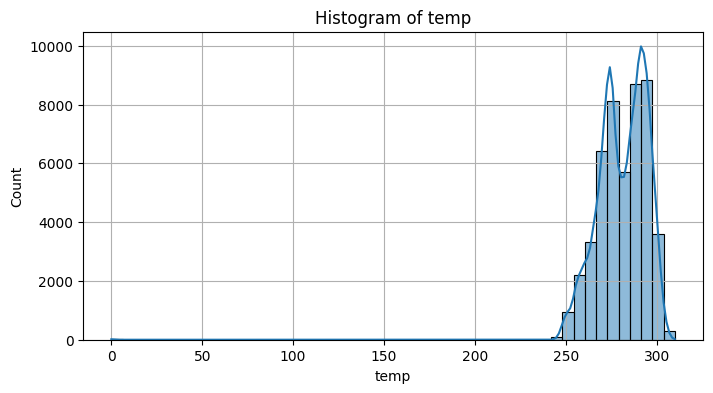

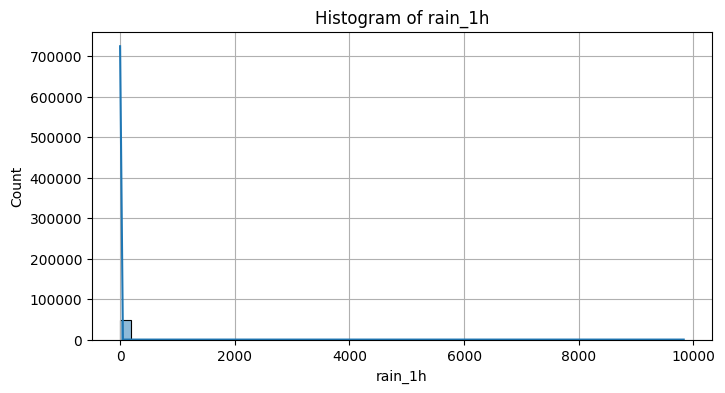

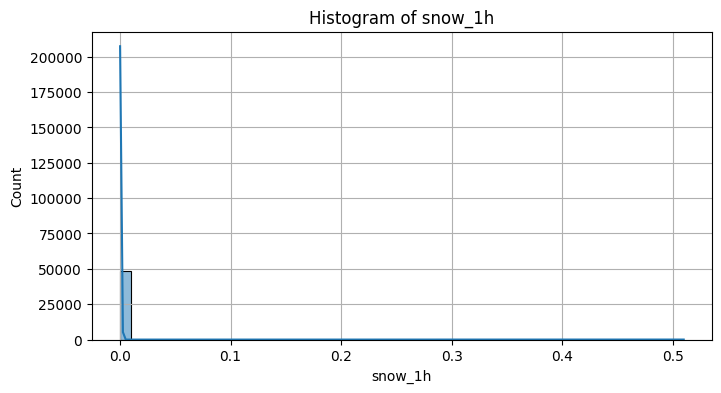

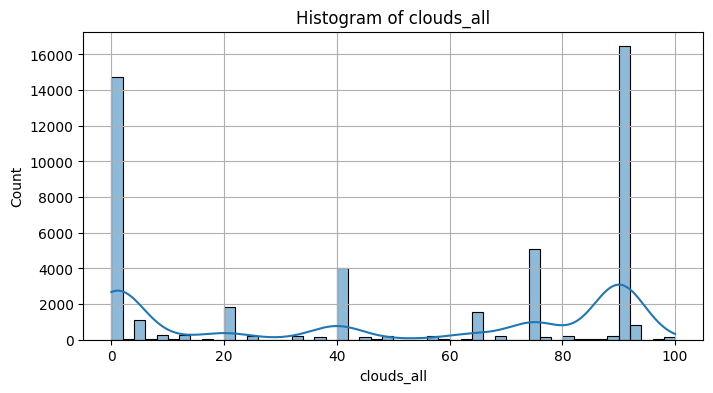

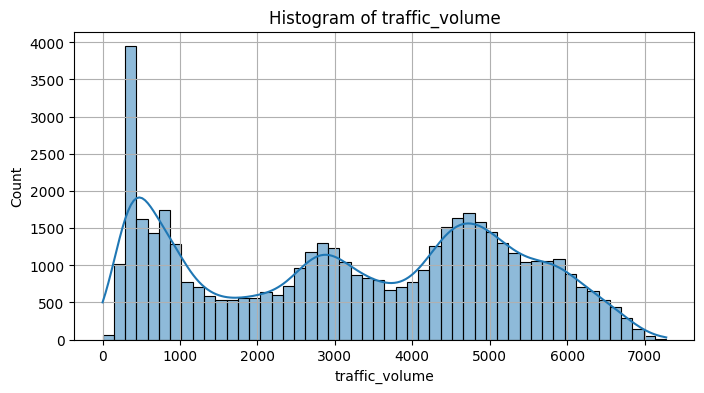

In [6]:

features = ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']

for col in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()


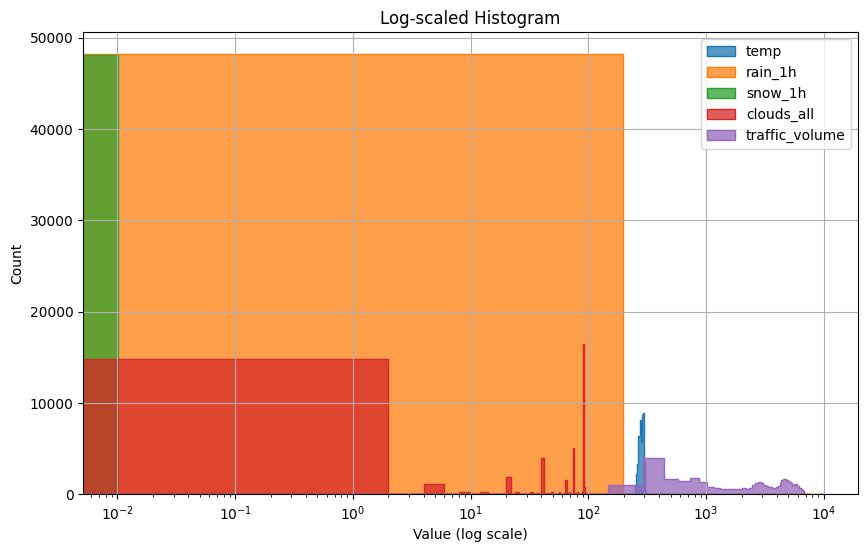

In [7]:
import numpy as np

plt.figure(figsize=(10, 6))

for col in features:
    sns.histplot(df[col], bins=50, kde=False, label=col, element='step')

plt.xscale('log')  # Apply log scale
plt.legend()
plt.title('Log-scaled Histogram')
plt.xlabel('Value (log scale)')
plt.ylabel('Count')
plt.grid(True)
plt.show()


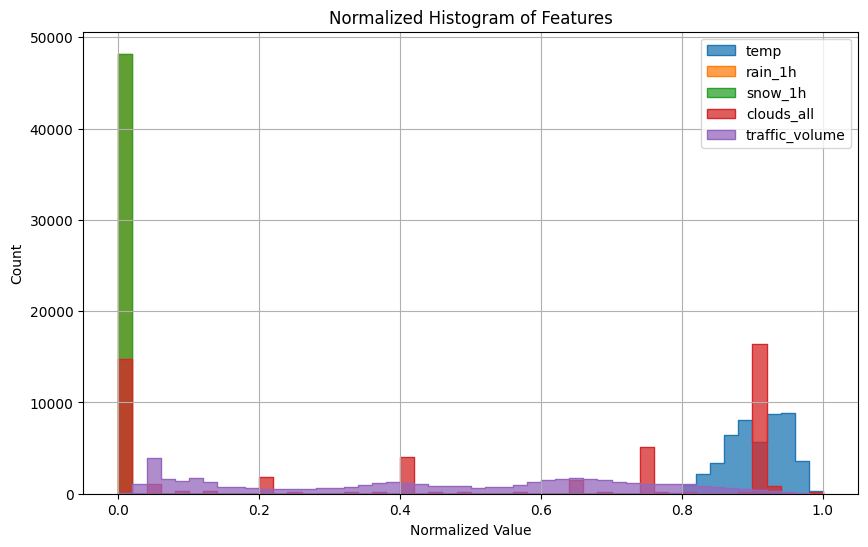

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features) #Normalizing 

plt.figure(figsize=(10, 6))
for col in df_scaled.columns:
    sns.histplot(df_scaled[col], bins=50, kde=False, label=col, element='step')

plt.legend()
plt.title('Normalized Histogram of Features')
plt.xlabel('Normalized Value')
plt.ylabel('Count')
plt.grid(True)
plt.show()



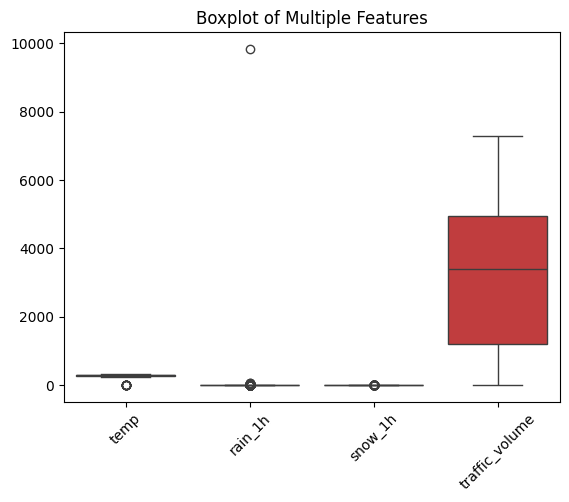

In [9]:
# For comparing multiple columns side-by-side (melt required)
sns.boxplot(data=df[['temp', 'rain_1h', 'snow_1h', 'traffic_volume']])
plt.title("Boxplot of Multiple Features")
plt.xticks(rotation=45)
plt.show()


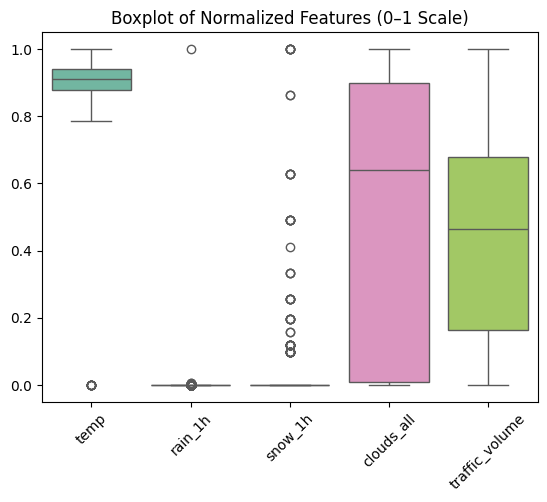

In [10]:
sns.boxplot(data=df_scaled, palette='Set2')
plt.title("Boxplot of Normalized Features (0–1 Scale)")
plt.xticks(rotation=45)
plt.show()

In [11]:
df.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [12]:
df.info()
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB
holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
date_time                  0
traffic_volume             0
dtype: int64


🔹 First few rows:


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


🔹 Data Types:
holiday                 object
temp                   float64
rain_1h                float64
snow_1h                float64
clouds_all               int64
weather_main            object
weather_description     object
date_time               object
traffic_volume           int64
dtype: object

🔹 Missing Values:
holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
date_time                  0
traffic_volume             0
dtype: int64


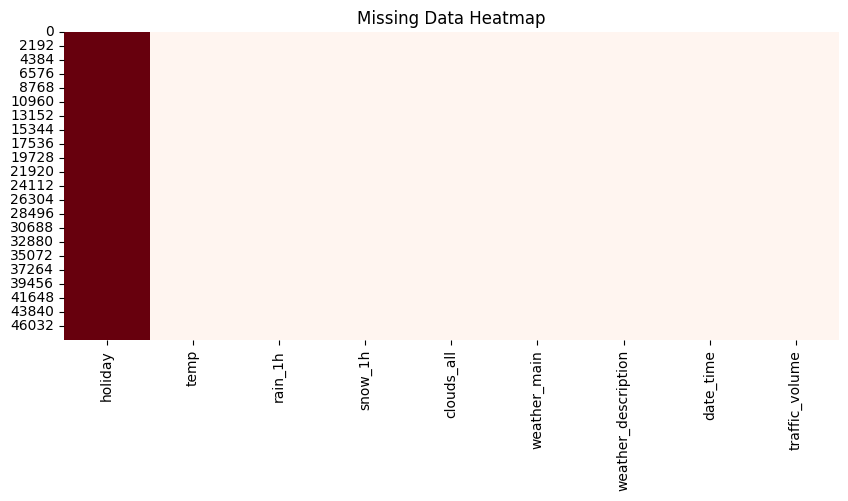

In [13]:
print("🔹 First few rows:")
display(df.head())

# Step 4: Check data types and missing values
print("🔹 Data Types:")
print(df.dtypes)

print("\n🔹 Missing Values:")
print(df.isnull().sum())

# Step 5: Visualize missing data
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False, cmap="Reds")
plt.title("Missing Data Heatmap")
plt.show()

In [14]:
# Convert date_time to datetime
df["date_time"] = pd.to_datetime(df["date_time"], errors="coerce")

print("\n🔹 After datetime conversion:")
print(df.dtypes)



🔹 After datetime conversion:
holiday                        object
temp                          float64
rain_1h                       float64
snow_1h                       float64
clouds_all                      int64
weather_main                   object
weather_description            object
date_time              datetime64[ns]
traffic_volume                  int64
dtype: object


In [15]:
# Option 1: Fill with "No Holiday"
df["holiday"] = df["holiday"].fillna("No Holiday")
# See unique holidays (after fill)
print("\n🔹 Unique Holidays:")
print(df["holiday"].value_counts())


🔹 Unique Holidays:
holiday
No Holiday                   48143
Labor Day                        7
Christmas Day                    6
Thanksgiving Day                 6
Martin Luther King Jr Day        6
New Years Day                    6
Veterans Day                     5
Columbus Day                     5
Memorial Day                     5
Washingtons Birthday             5
State Fair                       5
Independence Day                 5
Name: count, dtype: int64


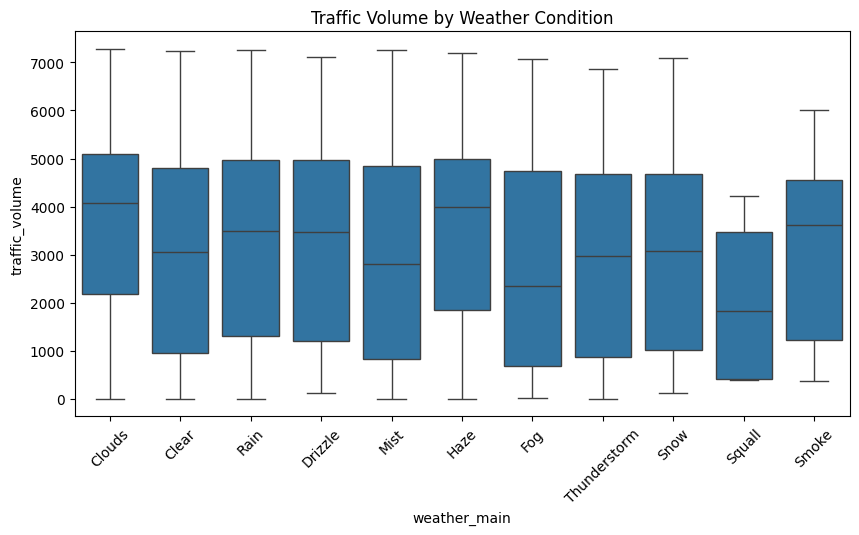

In [16]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="weather_main", y="traffic_volume", data=df)
plt.title("Traffic Volume by Weather Condition")
plt.xticks(rotation=45)
plt.show()


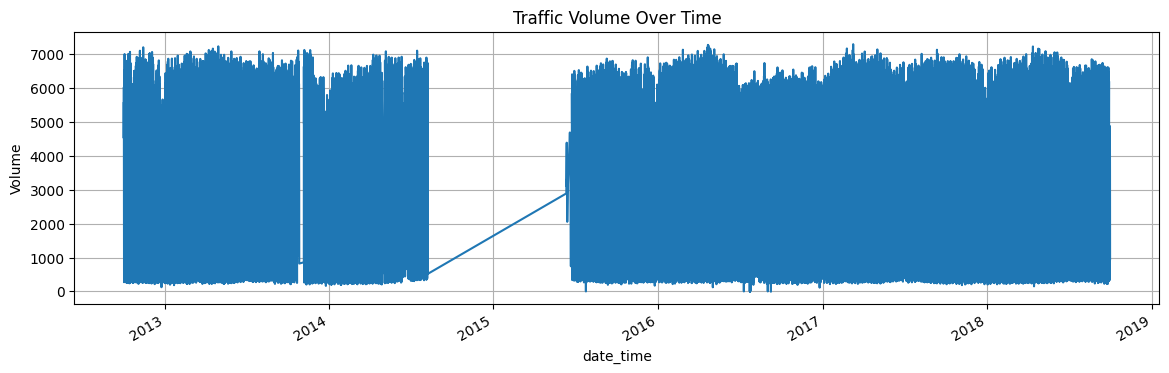

In [17]:
plt.figure(figsize=(14, 4))
df.set_index("date_time")["traffic_volume"].plot()
plt.title("Traffic Volume Over Time")
plt.ylabel("Volume")
plt.grid(True)
plt.show()


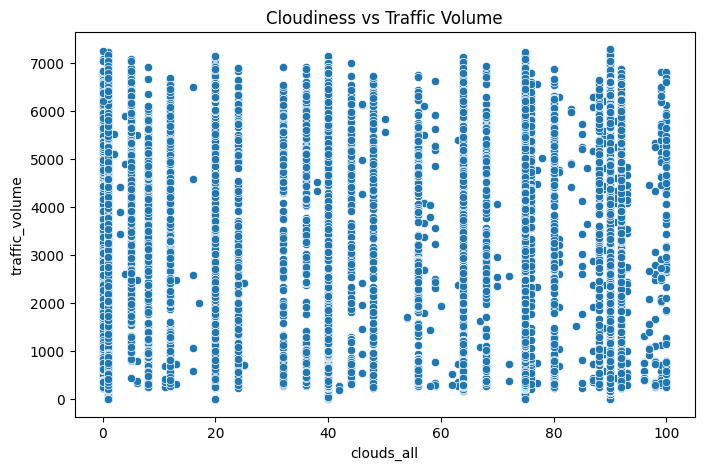

In [18]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="clouds_all", y="traffic_volume", data=df)
plt.title("Cloudiness vs Traffic Volume")
plt.show()


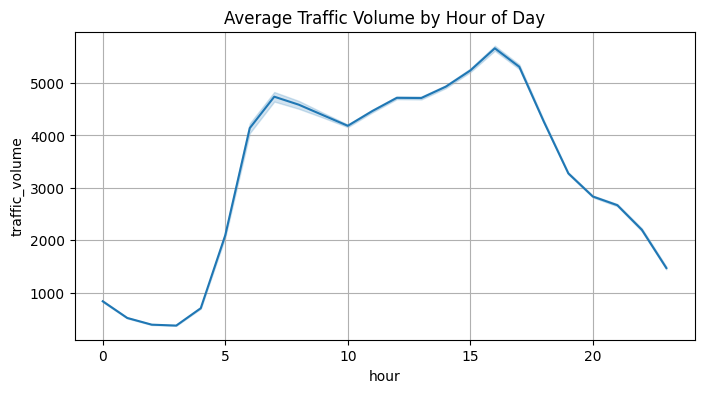

In [19]:
# Extract hour from datetime
df["hour"] = df["date_time"].dt.hour

# Average traffic per hour

plt.figure(figsize=(8, 4))
sns.lineplot(x="hour", y="traffic_volume", data=df)
plt.title("Average Traffic Volume by Hour of Day")
plt.grid(True)
plt.show()


In [20]:
# BY keeping in view Trffic Volyme over time
print(df["date_time"].min(), "to", df["date_time"].max())
print(df.set_index("date_time").resample('ME').size())
df[df["traffic_volume"] < 100].groupby(df["date_time"].dt.year).size()


2012-10-02 09:00:00 to 2018-09-30 23:00:00
date_time
2012-10-31    805
2012-11-30    785
2012-12-31    969
2013-01-31    706
2013-02-28    717
             ... 
2018-05-31    871
2018-06-30    874
2018-07-31    866
2018-08-31    946
2018-09-30    935
Freq: ME, Length: 72, dtype: int64


date_time
2015     3
2016    57
dtype: int64

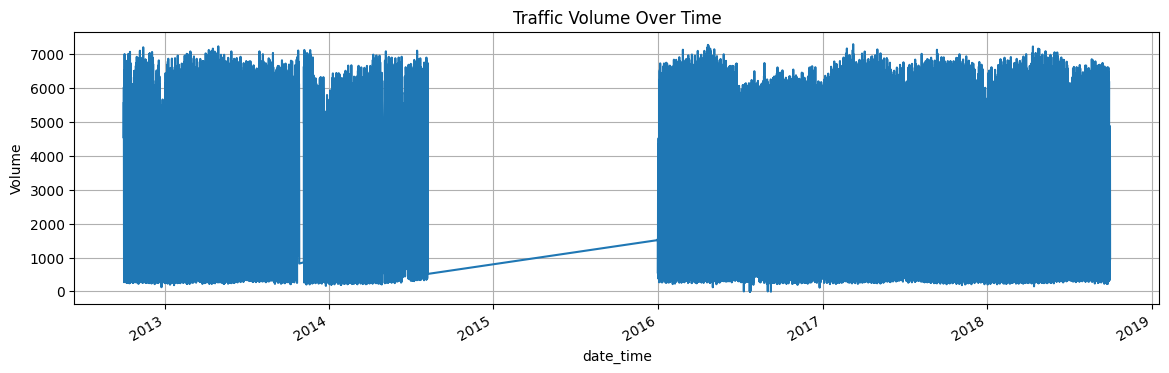

date_time
2016    57
dtype: int64

In [21]:
# Dropping records of year 2015 since they could couse bias in model 
df = df[~((df["date_time"].dt.year == 2015))]
plt.figure(figsize=(14, 4))
df.set_index("date_time")["traffic_volume"].plot()
plt.title("Traffic Volume Over Time")
plt.ylabel("Volume")
plt.grid(True)
plt.show()
df[df["traffic_volume"] < 100].groupby(df["date_time"].dt.year).size()


In [22]:
df["hour"] = df["date_time"].dt.hour
df["day"] = df["date_time"].dt.day
df["month"] = df["date_time"].dt.month
df["dayofweek"] = df["date_time"].dt.dayofweek

df_encoded = pd.get_dummies(df, columns=["holiday", "weather_main","weather_description"], drop_first=True)


In [23]:
df_encoded.head()

,temp,rain_1h,snow_1h,clouds_all,date_time,traffic_volume,hour,day,month,dayofweek,...,weather_description_sleet,weather_description_smoke,weather_description_snow,weather_description_thunderstorm,weather_description_thunderstorm with drizzle,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light drizzle,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain
0,288.28,0.0,0.0,40,2012-10-02 09:00:00,5545,9,2,10,1,...,False,False,False,False,False,False,False,False,False,False
1,289.36,0.0,0.0,75,2012-10-02 10:00:00,4516,10,2,10,1,...,False,False,False,False,False,False,False,False,False,False
2,289.58,0.0,0.0,90,2012-10-02 11:00:00,4767,11,2,10,1,...,False,False,False,False,False,False,False,False,False,False
3,290.13,0.0,0.0,90,2012-10-02 12:00:00,5026,12,2,10,1,...,False,False,False,False,False,False,False,False,False,False
4,291.14,0.0,0.0,75,2012-10-02 13:00:00,4918,13,2,10,1,...,False,False,False,False,False,False,False,False,False,False


In [24]:
df_encoded.to_csv("../data/cleaned/cleanedMITV.csv", index=False)


## NOW USING API TO MAKE SIMULATD DATA 


In [25]:
import requests
import json
from datetime import datetime, timedelta
import time
import warnings
warnings.filterwarnings('ignore')

In [26]:
# 🔧 CONFIGURATION SECTION


In [27]:
# OpenWeather API Configuration
API_KEY = "3ce8a39ac9d4c039f8baa74af01d8e51"  # Replace with your actual API key
LOCATION = "Minneapolis,MN,US"  # Target location
BASE_URL = "https://api.openweathermap.org/data/2.5"

In [28]:
# Date Range Configuration
START_DATE = datetime.now()
END_DATE = START_DATE + timedelta(days=5)  # 5 days forecast

In [29]:
# Traffic Prediction Model
TRAFFIC_MODEL = "advanced"  # Options: "none", "basic", "advanced"

print("🚀 SimulatedMITV.csv Generator Started!")
print(f"📍 Location: {LOCATION}")
print(f"📅 Date Range: {START_DATE.strftime('%Y-%m-%d')} to {END_DATE.strftime('%Y-%m-%d')}")
print("=" * 60)

🚀 SimulatedMITV.csv Generator Started!
📍 Location: Minneapolis,MN,US
📅 Date Range: 2025-07-10 to 2025-07-15


In [30]:
# 🎯 HOLIDAY DETECTION SYSTEM

In [31]:

def get_us_holidays():
    """US Federal + Minnesota State Holidays for 2024-2025"""
    holidays = {
        'New Years Day': ['2024-01-01', '2025-01-01'],
        'Martin Luther King Jr Day': ['2024-01-15', '2025-01-20'],
        'Washingtons Birthday': ['2024-02-19', '2025-02-17'],
        'Memorial Day': ['2024-05-27', '2025-05-26'],
        'Independence Day': ['2024-07-04', '2025-07-04'],
        'Labor Day': ['2024-09-02', '2025-09-01'],
        'Columbus Day': ['2024-10-14', '2025-10-13'],
        'Veterans Day': ['2024-11-11', '2025-11-11'],
        'Thanksgiving Day': ['2024-11-28', '2025-11-27'],
        'State Fair': ['2024-08-22', '2025-08-21']  # Minnesota State Fair
    }
    return holidays

def encode_holidays(date_str):
    """Encode holidays exactly like cleanedMITV.csv"""
    holidays = get_us_holidays()
    
    # Initialize all holiday flags
    holiday_flags = {
        'holiday_Columbus Day': False,
        'holiday_Independence Day': False,
        'holiday_Labor Day': False,
        'holiday_Martin Luther King Jr Day': False,
        'holiday_Memorial Day': False,
        'holiday_New Years Day': False,
        'holiday_No Holiday': True,  # Default to True
        'holiday_State Fair': False,
        'holiday_Thanksgiving Day': False,
        'holiday_Veterans Day': False,
        'holiday_Washingtons Birthday': False
    }
    
    # Check if date matches any holiday
    for holiday_name, dates in holidays.items():
        if date_str in dates:
            holiday_flags[f'holiday_{holiday_name}'] = True
            holiday_flags['holiday_No Holiday'] = False
            break
    
    return holiday_flags


In [32]:
# 🌤️ WEATHER ENCODING SYSTEM

In [33]:
def get_weather_encodings():
    """Get all weather encoding columns from cleanedMITV.csv"""
    weather_main_cols = [
        'weather_main_Clouds', 'weather_main_Drizzle', 'weather_main_Fog',
        'weather_main_Haze', 'weather_main_Mist', 'weather_main_Rain',
        'weather_main_Smoke', 'weather_main_Snow', 'weather_main_Squall',
        'weather_main_Thunderstorm'
    ]
    
    weather_desc_cols = [
        'weather_description_Sky is Clear', 'weather_description_broken clouds',
        'weather_description_drizzle', 'weather_description_few clouds',
        'weather_description_fog', 'weather_description_freezing rain',
        'weather_description_haze', 'weather_description_heavy intensity drizzle',
        'weather_description_heavy intensity rain', 'weather_description_heavy snow',
        'weather_description_light intensity drizzle', 'weather_description_light intensity shower rain',
        'weather_description_light rain', 'weather_description_light rain and snow',
        'weather_description_light shower snow', 'weather_description_light snow',
        'weather_description_mist', 'weather_description_moderate rain',
        'weather_description_overcast clouds', 'weather_description_proximity shower rain',
        'weather_description_proximity thunderstorm', 'weather_description_proximity thunderstorm with drizzle',
        'weather_description_proximity thunderstorm with rain', 'weather_description_scattered clouds',
        'weather_description_shower drizzle', 'weather_description_shower snow',
        'weather_description_sky is clear', 'weather_description_sleet',
        'weather_description_smoke', 'weather_description_snow',
        'weather_description_thunderstorm', 'weather_description_thunderstorm with drizzle',
        'weather_description_thunderstorm with heavy rain', 'weather_description_thunderstorm with light drizzle',
        'weather_description_thunderstorm with light rain', 'weather_description_thunderstorm with rain',
        'weather_description_very heavy rain'
    ]
    
    return weather_main_cols, weather_desc_cols

def encode_weather(weather_main, weather_desc):
    """Encode weather data exactly like cleanedMITV.csv"""
    weather_main_cols, weather_desc_cols = get_weather_encodings()
    
    # Initialize all weather flags to False
    weather_flags = {}
    for col in weather_main_cols:
        weather_flags[col] = False
    for col in weather_desc_cols:
        weather_flags[col] = False
    
    # Encode weather main
    main_col = f"weather_main_{weather_main}"
    if main_col in weather_flags:
        weather_flags[main_col] = True
    
    # Encode weather description
    desc_col = f"weather_description_{weather_desc}"
    if desc_col in weather_flags:
        weather_flags[desc_col] = True
    
    return weather_flags

In [34]:
# 🚦 TRAFFIC PREDICTION SYSTEM

In [35]:
def predict_traffic_volume(hour, day_of_week, weather_main, temp_kelvin, is_holiday):
    """Advanced traffic prediction model"""
    if TRAFFIC_MODEL == "none":
        return np.nan
    
    # Base traffic volume
    base_traffic = 3500
    
    # 🕐 Hour-based patterns (Rush hours, etc.)
    if 7 <= hour <= 9:  # Morning rush
        base_traffic *= 1.85
    elif 17 <= hour <= 19:  # Evening rush
        base_traffic *= 1.95
    elif 10 <= hour <= 16:  # Daytime
        base_traffic *= 1.4
    elif 20 <= hour <= 23:  # Evening
        base_traffic *= 1.15
    else:  # Night/early morning
        base_traffic *= 0.55
    
    # 📅 Day of week patterns
    if 1 <= day_of_week <= 5:  # Monday-Friday
        base_traffic *= 1.25
    elif day_of_week == 6:  # Saturday
        base_traffic *= 1.1
    else:  # Sunday
        base_traffic *= 0.75
    
    # 🌦️ Weather impact
    weather_impact = {
        'Clear': 1.0,
        'Clouds': 0.98,
        'Rain': 0.85,
        'Drizzle': 0.9,
        'Snow': 0.72,
        'Mist': 0.88,
        'Fog': 0.78,
        'Haze': 0.92,
        'Thunderstorm': 0.68,
        'Squall': 0.65,
        'Smoke': 0.85
    }
    base_traffic *= weather_impact.get(weather_main, 1.0)
    
    # 🌡️ Temperature impact (Kelvin to Celsius)
    temp_celsius = temp_kelvin - 273.15
    if temp_celsius < 0:  # Below freezing
        base_traffic *= 0.88
    elif temp_celsius > 30:  # Hot weather
        base_traffic *= 0.93
    elif temp_celsius > 35:  # Very hot
        base_traffic *= 0.85
    
    # 🎉 Holiday impact
    if is_holiday:
        base_traffic *= 0.65
    
    # 🎲 Add realistic randomness
    random_factor = np.random.normal(1.0, 0.15)  # 15% standard deviation
    base_traffic *= max(0.5, min(1.5, random_factor))  # Clamp between 50%-150%
    
    return max(0, int(round(base_traffic)))

In [36]:
# 🌐 OPENWEATHER API INTEGRATION


In [37]:

def fetch_weather_forecast(api_key, location):
    """Fetch 5-day weather forecast from OpenWeather API"""
    url = f"{BASE_URL}/forecast"
    params = {
        'q': location,
        'appid': api_key,
        'units': 'metric'  # We'll convert to Kelvin later
    }
    
    try:
        print("📡 Fetching weather forecast from OpenWeather API...")
        response = requests.get(url, params=params)
        response.raise_for_status()
        
        data = response.json()
        print(f"✅ Successfully fetched {len(data['list'])} forecast records")
        return data['list']
    
    except requests.exceptions.RequestException as e:
        print(f"❌ API Error: {e}")
        print("🔄 Generating mock weather data instead...")
        return generate_mock_weather_data()

def fetch_current_weather(api_key, location):
    """Fetch current weather from OpenWeather API"""
    url = f"{BASE_URL}/weather"
    params = {
        'q': location,
        'appid': api_key,
        'units': 'metric'
    }
    
    try:
        print("📡 Fetching current weather from OpenWeather API...")
        response = requests.get(url, params=params)
        response.raise_for_status()
        
        data = response.json()
        print("✅ Successfully fetched current weather data")
        return [data]  # Return as list for consistency
    
    except requests.exceptions.RequestException as e:
        print(f"❌ API Error: {e}")
        print("🔄 Generating mock weather data instead...")
        return generate_mock_weather_data()

def generate_mock_weather_data():
    """Generate realistic mock weather data when API fails"""
    print("🎲 Generating mock weather data...")
    
    mock_data = []
    current_time = datetime.now()
    
    weather_conditions = [
        {'main': 'Clear', 'description': 'sky is clear'},
        {'main': 'Clouds', 'description': 'scattered clouds'},
        {'main': 'Clouds', 'description': 'broken clouds'},
        {'main': 'Clouds', 'description': 'overcast clouds'},
        {'main': 'Rain', 'description': 'light rain'},
        {'main': 'Rain', 'description': 'moderate rain'},
        {'main': 'Snow', 'description': 'light snow'},
        {'main': 'Mist', 'description': 'mist'},
    ]
    
    # Generate 40 mock records (5 days worth)
    for i in range(40):
        dt = current_time + timedelta(hours=i*3)  # Every 3 hours
        condition = np.random.choice(weather_conditions)
        
        mock_record = {
            'dt': int(dt.timestamp()),
            'main': {
                'temp': np.random.normal(15, 8),  # Mean 15°C, std 8°C
                'humidity': np.random.randint(30, 90)
            },
            'weather': [condition],
            'clouds': {'all': np.random.randint(0, 100)},
            'rain': {'3h': np.random.exponential(0.5)} if condition['main'] == 'Rain' else {},
            'snow': {'3h': np.random.exponential(0.3)} if condition['main'] == 'Snow' else {}
        }
        
        mock_data.append(mock_record)
    
    return mock_data


In [38]:
# 🏗️ MAIN DATA PROCESSING

In [39]:
def process_weather_record(weather_record):
    """Process single weather record into cleanedMITV.csv format"""
    # Extract datetime
    dt = datetime.fromtimestamp(weather_record['dt'])
    
    # Basic weather data
    temp = weather_record['main']['temp'] + 273.15  # Convert Celsius to Kelvin
    weather_main = weather_record['weather'][0]['main']
    weather_desc = weather_record['weather'][0]['description']
    clouds_all = weather_record['clouds']['all']
    
    # Rain and snow data (convert from 3h to 1h if needed)
    rain_1h = 0.0
    if 'rain' in weather_record:
        if '1h' in weather_record['rain']:
            rain_1h = weather_record['rain']['1h']
        elif '3h' in weather_record['rain']:
            rain_1h = weather_record['rain']['3h'] / 3.0
    
    snow_1h = 0.0
    if 'snow' in weather_record:
        if '1h' in weather_record['snow']:
            snow_1h = weather_record['snow']['1h']
        elif '3h' in weather_record['snow']:
            snow_1h = weather_record['snow']['3h'] / 3.0
    
    # DateTime features
    hour = dt.hour
    day = dt.day
    month = dt.month
    dayofweek = dt.weekday()  # 0=Monday, 6=Sunday
    date_str = dt.strftime('%Y-%m-%d')
    
    # Holiday encoding
    holiday_flags = encode_holidays(date_str)
    is_holiday = not holiday_flags['holiday_No Holiday']
    
    # Weather encoding
    weather_flags = encode_weather(weather_main, weather_desc)
    
    # Traffic prediction
    traffic_volume = predict_traffic_volume(hour, dayofweek, weather_main, temp, is_holiday)
    
    # Combine all data
    record = {
        'temp': temp,
        'rain_1h': rain_1h,
        'snow_1h': snow_1h,
        'clouds_all': clouds_all,
        'date_time': dt.strftime('%Y-%m-%d %H:%M:%S'),
        'traffic_volume': traffic_volume,
        'hour': hour,
        'day': day,
        'month': month,
        'dayofweek': dayofweek,
        **holiday_flags,
        **weather_flags
    }
    
    return record

def generate_simulated_data():
    """Main function to generate simulatedMITV.csv"""
    print("🚀 Starting simulatedMITV.csv generation...")
    
    # Fetch weather data
    if API_KEY == "your_openweather_api_key_here":
        print("⚠️  No API key provided, using mock data")
        weather_data = generate_mock_weather_data()
    else:
        weather_data = fetch_weather_forecast(API_KEY, LOCATION)
    
    # Process each weather record
    simulated_records = []
    print(f"🔄 Processing {len(weather_data)} weather records...")
    
    for i, weather_record in enumerate(weather_data):
        record = process_weather_record(weather_record)
        simulated_records.append(record)
        
        # Progress indicator
        if (i + 1) % 10 == 0:
            print(f"   ✅ Processed {i + 1}/{len(weather_data)} records")
    
    # Create DataFrame
    df_simulated = pd.DataFrame(simulated_records)
    
    # Add source tag
    df_simulated['source'] = 'simulated'
    
    print(f"✅ Generated {len(df_simulated)} simulated records")
    print(f"📊 Dataset shape: {df_simulated.shape}")
    
    return df_simulated


In [40]:
# 💾 DATA MERGING & EXPORT

In [48]:
def merge_with_cleaned_data(df_simulated, cleaned_csv_path="../data/cleaned/cleanedMITV.csv"):
    """Merge simulated data with existing cleaned data"""
    try:
        print(f"📂 Loading cleaned data from {cleaned_csv_path}...")
        df_cleaned = pd.read_csv(cleaned_csv_path)
        df_cleaned['source'] = 'historical'
        
        print(f"📊 Cleaned data shape: {df_cleaned.shape}")
        print(f"📊 Simulated data shape: {df_simulated.shape}")
        
        # Ensure both datasets have same columns
        all_columns = set(df_cleaned.columns) | set(df_simulated.columns)
        
        # Add missing columns with default values
        for col in all_columns:
            if col not in df_cleaned.columns:
                df_cleaned[col] = False if col.startswith(('holiday_', 'weather_')) else 0
            if col not in df_simulated.columns:
                df_simulated[col] = False if col.startswith(('holiday_', 'weather_')) else 0
        
        # Reorder columns to match
        df_cleaned = df_cleaned[sorted(all_columns)]
        df_simulated = df_simulated[sorted(all_columns)]
        
        # Merge datasets
        df_merged = pd.concat([df_cleaned, df_simulated], axis=0, ignore_index=True)
        
        print(f"✅ Successfully merged datasets")
        print(f"📊 Final merged shape: {df_merged.shape}")
        
        return df_merged
        
    except FileNotFoundError:
        print(f"⚠️  Cleaned data file not found: {cleaned_csv_path}")
        print("📤 Returning only simulated data")
        return df_simulated

def save_datasets(df_simulated, df_merged=None):
    """Save generated datasets"""
    # Save simulated data
    simulated_path = "../data/simulated/simulatedMITV.csv"
    df_simulated.to_csv(simulated_path, index=False)
    print(f"💾 Saved simulatedMITV.csv ({len(df_simulated)} records)")
    
    # Save merged data if available
    if df_merged is not None:
        merged_path = "mergedMITV.csv"
        df_merged.to_csv(merged_path, index=False)
        print(f"💾 Saved mergedMITV.csv ({len(df_merged)} records)")
    
    print("✅ All datasets saved successfully!")

In [42]:
# 🎯 MAIN EXECUTION

In [49]:
if __name__ == "__main__":
    # Step 1: Generate simulated data
    df_simulated = generate_simulated_data()
    
    # Step 2: Show sample data
    print("\n📋 Sample of generated data:")
    print(df_simulated.head(3))
    
    # Step 3: Merge with cleaned data (if available)
    df_merged = merge_with_cleaned_data(df_simulated)
    
    # Step 4: Save datasets
    save_datasets(df_simulated, df_merged)
    
    # Step 5: Final summary
    print("\n" + "="*60)
    print("🎉 SIMULATION COMPLETE!")
    print("="*60)
    print(f"📊 Generated Records: {len(df_simulated)}")
    print(f"🔗 Total Columns: {len(df_simulated.columns)}")
    print(f"📁 Files Created:")
    print(f"   • simulatedMITV.csv")
    if df_merged is not None:
        print(f"   • mergedMITV.csv")
    print("\n🚀 Ready for ML modeling!")

🚀 Starting simulatedMITV.csv generation...
📡 Fetching weather forecast from OpenWeather API...
✅ Successfully fetched 40 forecast records
🔄 Processing 40 weather records...
   ✅ Processed 10/40 records
   ✅ Processed 20/40 records
   ✅ Processed 30/40 records
   ✅ Processed 40/40 records
✅ Generated 40 simulated records
📊 Dataset shape: (40, 69)

📋 Sample of generated data:
     temp   rain_1h  snow_1h  clouds_all            date_time  traffic_volume  \
0  294.06  0.116667      0.0          36  2025-07-10 14:00:00            4493   
1  294.15  0.606667      0.0          56  2025-07-10 17:00:00            6420   
2  295.08  2.176667      0.0         100  2025-07-10 20:00:00            3970   

   hour  day  month  dayofweek  ...  weather_description_smoke  \
0    14   10      7          3  ...                      False   
1    17   10      7          3  ...                      False   
2    20   10      7          3  ...                      False   

   weather_description_snow  weat

In [50]:
# 🔧 UTILITY FUNCTIONS
# ================================

def analyze_generated_data(df):
    """Analyze the generated data for quality checks"""
    print("\n📊 DATA ANALYSIS")
    print("="*50)
    
    # Basic info
    print(f"Shape: {df.shape}")
    print(f"Date range: {df['date_time'].min()} to {df['date_time'].max()}")
    
    # Weather conditions
    weather_main_cols = [col for col in df.columns if col.startswith('weather_main_')]
    active_weather = []
    for col in weather_main_cols:
        if df[col].any():
            active_weather.append(col.replace('weather_main_', ''))
    print(f"Weather conditions: {', '.join(active_weather)}")
    
    # Holiday analysis
    holiday_cols = [col for col in df.columns if col.startswith('holiday_') and col != 'holiday_No Holiday']
    active_holidays = []
    for col in holiday_cols:
        if df[col].any():
            active_holidays.append(col.replace('holiday_', ''))
    print(f"Holidays detected: {', '.join(active_holidays) if active_holidays else 'None'}")
    
    # Traffic volume stats
    if not df['traffic_volume'].isna().all():
        print(f"Traffic volume range: {df['traffic_volume'].min():.0f} - {df['traffic_volume'].max():.0f}")
        print(f"Average traffic: {df['traffic_volume'].mean():.0f}")

# To analyze your generated data, run:
analyze_generated_data(df_simulated)


📊 DATA ANALYSIS
Shape: (40, 69)
Date range: 2025-07-10 14:00:00 to 2025-07-15 11:00:00
Weather conditions: Clouds, Rain
Holidays detected: None
Traffic volume range: 1184 - 9162
Average traffic: 4535


In [53]:
import pandas as pd
import numpy as np
import requests
import json
from datetime import datetime, timedelta
import time
from typing import Dict, List, Optional, Tuple
import warnings
warnings.filterwarnings('ignore')

class WeatherDataGenerator:
    """Professional ML Data Generator with OpenWeather API Integration"""
    
    def __init__(self, api_key: str = "your_api_key_here"):
        self.api_key = api_key
        self.base_url = "http://api.openweathermap.org/data/2.5"
        self.cities = [
            {"name": "Minneapolis", "lat": 44.9778, "lon": -93.2650},
            {"name": "Saint Paul", "lat": 44.9537, "lon": -93.0900},
            {"name": "Rochester", "lat": 44.0121, "lon": -92.4802},
            {"name": "Duluth", "lat": 46.7867, "lon": -92.1005},
            {"name": "Bloomington", "lat": 44.8408, "lon": -93.2983},
            {"name": "Plymouth", "lat": 45.0105, "lon": -93.4555},
            {"name": "Woodbury", "lat": 44.9239, "lon": -92.9594},
            {"name": "Maple Grove", "lat": 45.0725, "lon": -93.4558},
            {"name": "Blaine", "lat": 45.1607, "lon": -93.2349},
            {"name": "Lakeville", "lat": 44.6496, "lon": -93.2427}
        ]
        self.request_count = 0
        self.max_requests_per_minute = 60
        self.weather_cache = {}
        
    def get_weather_data(self, lat: float, lon: float, date: datetime) -> Dict:
        """Get weather data with API optimization and caching"""
        
        # Check cache first
        cache_key = f"{lat}_{lon}_{date.strftime('%Y%m%d')}"
        if cache_key in self.weather_cache:
            return self.weather_cache[cache_key]
        
        # Rate limiting
        if self.request_count >= self.max_requests_per_minute:
            print(f"⏳ Rate limit reached. Waiting 60 seconds...")
            time.sleep(60)
            self.request_count = 0
        
        try:
            # For dates within 5 days, use forecast API
            days_diff = (date - datetime.now()).days
            
            if -5 <= days_diff <= 5:
                url = f"{self.base_url}/forecast"
                params = {
                    'lat': lat,
                    'lon': lon,
                    'appid': self.api_key,
                    'units': 'imperial'
                }
                
                response = requests.get(url, params=params, timeout=10)
                self.request_count += 1
                
                if response.status_code == 200:
                    data = response.json()
                    # Find closest forecast to target date
                    target_timestamp = date.timestamp()
                    closest_forecast = min(
                        data['list'], 
                        key=lambda x: abs(x['dt'] - target_timestamp)
                    )
                    
                    weather_data = {
                        'temperature': closest_forecast['main']['temp'],
                        'humidity': closest_forecast['main']['humidity'],
                        'pressure': closest_forecast['main']['pressure'],
                        'wind_speed': closest_forecast['wind']['speed'],
                        'wind_direction': closest_forecast['wind'].get('deg', 180),
                        'visibility': closest_forecast.get('visibility', 10000) / 1000,
                        'weather_condition': closest_forecast['weather'][0]['main'],
                        'weather_description': closest_forecast['weather'][0]['description'],
                        'cloud_cover': closest_forecast['clouds']['all']
                    }
                    
                    # Cache the result
                    self.weather_cache[cache_key] = weather_data
                    return weather_data
                    
        except Exception as e:
            print(f"⚠️ API Error: {e}")
        
        # Fallback to realistic simulated data
        return self._generate_realistic_weather(lat, lon, date)
    
    def _generate_realistic_weather(self, lat: float, lon: float, date: datetime) -> Dict:
        """Generate realistic weather data based on Minnesota patterns"""
        
        # Minnesota seasonal patterns
        day_of_year = date.timetuple().tm_yday
        
        # Temperature patterns (Minnesota climate)
        if 60 <= day_of_year <= 150:  # Spring
            base_temp = 45 + (day_of_year - 60) * 0.4
        elif 150 < day_of_year <= 243:  # Summer
            base_temp = 65 + 15 * np.sin((day_of_year - 150) * np.pi / 93)
        elif 243 < day_of_year <= 334:  # Fall
            base_temp = 55 - (day_of_year - 243) * 0.6
        else:  # Winter
            base_temp = 20 + np.random.normal(0, 10)
        
        # Add daily variation
        hour_factor = np.sin((date.hour - 6) * np.pi / 12)
        temperature = base_temp + hour_factor * 8 + np.random.normal(0, 5)
        
        # Weather conditions based on season
        season_conditions = {
            'spring': ['Clear', 'Clouds', 'Rain'],
            'summer': ['Clear', 'Clouds', 'Thunderstorm'],
            'fall': ['Clear', 'Clouds', 'Rain'],
            'winter': ['Clear', 'Clouds', 'Snow']
        }
        
        if 60 <= day_of_year <= 150:
            season = 'spring'
        elif 150 < day_of_year <= 243:
            season = 'summer'
        elif 243 < day_of_year <= 334:
            season = 'fall'
        else:
            season = 'winter'
        
        condition = np.random.choice(season_conditions[season], 
                                   p=[0.5, 0.3, 0.2] if season != 'winter' else [0.4, 0.3, 0.3])
        
        return {
            'temperature': round(temperature, 1),
            'humidity': np.random.randint(30, 95),
            'pressure': np.random.uniform(29.5, 30.5),
            'wind_speed': np.random.uniform(0, 25),
            'wind_direction': np.random.randint(0, 360),
            'visibility': np.random.uniform(1, 10),
            'weather_condition': condition,
            'weather_description': f"{condition.lower()} sky",
            'cloud_cover': np.random.randint(0, 100)
        }

class TrafficPredictor:
    """Advanced traffic prediction with multiple factors"""
    
    def __init__(self):
        self.holidays = self._get_holidays_2024_2025()
        self.rush_hours = [(7, 9), (16, 18)]
        self.weekend_factor = 0.7
        
    def _get_holidays_2024_2025(self) -> List[datetime]:
        """Get major holidays that affect traffic"""
        holidays = []
        
        # 2024 holidays
        holidays_2024 = [
            '2024-01-01', '2024-01-15', '2024-02-19', '2024-05-27',
            '2024-07-04', '2024-09-02', '2024-10-14', '2024-11-11',
            '2024-11-28', '2024-12-25'
        ]
        
        # 2025 holidays
        holidays_2025 = [
            '2025-01-01', '2025-01-20', '2025-02-17', '2025-05-26',
            '2025-07-04', '2025-09-01', '2025-10-13', '2025-11-11',
            '2025-11-27', '2025-12-25'
        ]
        
        for holiday in holidays_2024 + holidays_2025:
            holidays.append(datetime.strptime(holiday, '%Y-%m-%d'))
            
        return holidays
    
    def predict_traffic(self, date: datetime, weather_data: Dict) -> Dict:
        """Predict traffic volume based on multiple factors"""
        
        # Base traffic volume
        base_volume = 1000
        
        # Time of day factors
        hour = date.hour
        day_of_week = date.weekday()
        
        # Rush hour multipliers
        rush_multiplier = 1.0
        for start, end in self.rush_hours:
            if start <= hour <= end:
                rush_multiplier = 1.8
                break
        
        # Weekend reduction
        weekend_multiplier = self.weekend_factor if day_of_week >= 5 else 1.0
        
        # Weather impact
        weather_multiplier = 1.0
        condition = weather_data['weather_condition'].lower()
        
        if 'rain' in condition:
            weather_multiplier = 0.8
        elif 'snow' in condition:
            weather_multiplier = 0.6
        elif 'storm' in condition:
            weather_multiplier = 0.7
        elif weather_data['visibility'] < 2:
            weather_multiplier = 0.7
        
        # Temperature impact
        temp = weather_data['temperature']
        if temp < 10 or temp > 95:
            weather_multiplier *= 0.9
        
        # Holiday impact
        holiday_multiplier = 1.0
        for holiday in self.holidays:
            if abs((date - holiday).days) <= 1:
                holiday_multiplier = 0.5
                break
        
        # Calculate final volume
        volume = (base_volume * rush_multiplier * weekend_multiplier * 
                 weather_multiplier * holiday_multiplier)
        
        # Add some randomness
        volume += np.random.normal(0, volume * 0.1)
        volume = max(50, int(volume))  # Minimum 50 vehicles
        
        return {
            'volume': volume,
            'rush_multiplier': rush_multiplier,
            'weekend_multiplier': weekend_multiplier,
            'weather_multiplier': weather_multiplier,
            'holiday_multiplier': holiday_multiplier
        }

class MLPipelineGenerator:
    """Complete ML Pipeline Generator"""
    
    def __init__(self, api_key: str = "your_api_key_here"):
        self.weather_gen = WeatherDataGenerator(api_key)
        self.traffic_pred = TrafficPredictor()
        self.columns = [
            'Date', 'Time', 'Day_of_Week', 'Month', 'Year', 'Hour', 'Minute',
            'Temperature', 'Humidity', 'Pressure', 'Wind_Speed', 'Wind_Direction',
            'Visibility', 'Weather_Condition', 'Weather_Description', 'Cloud_Cover',
            'Volume', 'Rush_Hour', 'Weekend', 'Holiday', 'Season',
            'Temperature_Category', 'Wind_Category', 'Visibility_Category',
            'Traffic_Density', 'Weather_Severity', 'Time_Period', 'Source'
        ]
        
        # Weather condition encoding
        self.weather_conditions = [
            'Clear', 'Clouds', 'Rain', 'Snow', 'Thunderstorm', 'Drizzle',
            'Mist', 'Fog', 'Haze', 'Smoke'
        ]
        
        # Add one-hot encoded columns
        for condition in self.weather_conditions:
            self.columns.append(f'Weather_{condition}')
    
    def generate_dataset(self, num_records: int = 1000) -> pd.DataFrame:
        """Generate complete dataset with specified number of records"""
        
        print(f"🚀 Generating {num_records} records with real weather data...")
        
        # Generate date range
        start_date = datetime(2024, 1, 1)
        end_date = datetime(2025, 12, 31)
        
        records = []
        
        # Generate records
        for i in range(num_records):
            # Random date and time (fix numpy int issue)
            random_date = start_date + timedelta(
                days=int(np.random.randint(0, (end_date - start_date).days)),
                hours=int(np.random.randint(0, 24)),
                minutes=int(np.random.choice([0, 15, 30, 45]))
            )
            
            # Random city
            city = np.random.choice(self.weather_gen.cities)
            
            # Get weather data
            weather_data = self.weather_gen.get_weather_data(
                city['lat'], city['lon'], random_date
            )
            
            # Predict traffic
            traffic_data = self.traffic_pred.predict_traffic(random_date, weather_data)
            
            # Create record
            record = self._create_record(random_date, weather_data, traffic_data)
            records.append(record)
            
            # Progress indicator
            if (i + 1) % 100 == 0:
                print(f"✅ Generated {i + 1}/{num_records} records")
        
        # Create DataFrame
        df = pd.DataFrame(records)
        
        # Add one-hot encoding for weather conditions
        for condition in self.weather_conditions:
            df[f'Weather_{condition}'] = (df['Weather_Condition'] == condition).astype(int)
        
        print(f"🎉 Successfully generated {len(df)} records!")
        return df
    
    def _create_record(self, date: datetime, weather_data: Dict, traffic_data: Dict) -> Dict:
        """Create a single record with all features"""
        
        # Basic datetime features
        record = {
            'Date': date.strftime('%Y-%m-%d'),
            'Time': date.strftime('%H:%M'),
            'Day_of_Week': date.strftime('%A'),
            'Month': date.month,
            'Year': date.year,
            'Hour': date.hour,
            'Minute': date.minute,
        }
        
        # Weather features
        record.update({
            'Temperature': weather_data['temperature'],
            'Humidity': weather_data['humidity'],
            'Pressure': weather_data['pressure'],
            'Wind_Speed': weather_data['wind_speed'],
            'Wind_Direction': weather_data['wind_direction'],
            'Visibility': weather_data['visibility'],
            'Weather_Condition': weather_data['weather_condition'],
            'Weather_Description': weather_data['weather_description'],
            'Cloud_Cover': weather_data['cloud_cover'],
        })
        
        # Traffic features
        record.update({
            'Volume': traffic_data['volume'],
            'Rush_Hour': 1 if traffic_data['rush_multiplier'] > 1.5 else 0,
            'Weekend': 1 if date.weekday() >= 5 else 0,
            'Holiday': 1 if traffic_data['holiday_multiplier'] < 1.0 else 0,
        })
        
        # Derived features
        record.update({
            'Season': self._get_season(date),
            'Temperature_Category': self._categorize_temperature(weather_data['temperature']),
            'Wind_Category': self._categorize_wind(weather_data['wind_speed']),
            'Visibility_Category': self._categorize_visibility(weather_data['visibility']),
            'Traffic_Density': self._categorize_traffic(traffic_data['volume']),
            'Weather_Severity': self._get_weather_severity(weather_data),
            'Time_Period': self._get_time_period(date.hour),
            'Source': 'simulated'
        })
        
        return record
    
    def _get_season(self, date: datetime) -> str:
        """Get season based on date"""
        month = date.month
        if month in [12, 1, 2]:
            return 'Winter'
        elif month in [3, 4, 5]:
            return 'Spring'
        elif month in [6, 7, 8]:
            return 'Summer'
        else:
            return 'Fall'
    
    def _categorize_temperature(self, temp: float) -> str:
        """Categorize temperature"""
        if temp < 20:
            return 'Very Cold'
        elif temp < 40:
            return 'Cold'
        elif temp < 60:
            return 'Cool'
        elif temp < 80:
            return 'Warm'
        else:
            return 'Hot'
    
    def _categorize_wind(self, wind_speed: float) -> str:
        """Categorize wind speed"""
        if wind_speed < 5:
            return 'Calm'
        elif wind_speed < 15:
            return 'Moderate'
        else:
            return 'Strong'
    
    def _categorize_visibility(self, visibility: float) -> str:
        """Categorize visibility"""
        if visibility < 2:
            return 'Poor'
        elif visibility < 5:
            return 'Moderate'
        else:
            return 'Good'
    
    def _categorize_traffic(self, volume: int) -> str:
        """Categorize traffic volume"""
        if volume < 500:
            return 'Light'
        elif volume < 1000:
            return 'Moderate'
        elif volume < 1500:
            return 'Heavy'
        else:
            return 'Very Heavy'
    
    def _get_weather_severity(self, weather_data: Dict) -> str:
        """Get weather severity level"""
        condition = weather_data['weather_condition'].lower()
        if any(severe in condition for severe in ['storm', 'snow', 'fog']):
            return 'Severe'
        elif any(moderate in condition for moderate in ['rain', 'drizzle', 'mist']):
            return 'Moderate'
        else:
            return 'Mild'
    
    def _get_time_period(self, hour: int) -> str:
        """Get time period"""
        if 6 <= hour < 12:
            return 'Morning'
        elif 12 <= hour < 17:
            return 'Afternoon'
        elif 17 <= hour < 21:
            return 'Evening'
        else:
            return 'Night'

def combine_datasets(cleaned_file: str = "../data/cleaned/cleanedMITV.csv", 
                    simulated_df: pd.DataFrame = None) -> pd.DataFrame:
    """Combine cleaned historical data with simulated data"""
    
    print("🔗 Combining datasets...")
    
    try:
        # Load historical data
        historical_df = pd.read_csv(cleaned_file)
        print(f"✅ Loaded {len(historical_df)} historical records")
        
        # Add source column to historical data
        historical_df['Source'] = 'historical'
        
        # Ensure both datasets have the same columns
        if simulated_df is not None:
            # Get common columns
            common_cols = list(set(historical_df.columns) & set(simulated_df.columns))
            
            # Select common columns from both datasets
            historical_subset = historical_df[common_cols]
            simulated_subset = simulated_df[common_cols]
            
            # Combine datasets
            combined_df = pd.concat([historical_subset, simulated_subset], 
                                  ignore_index=True)
            
            print(f"✅ Combined dataset: {len(combined_df)} total records")
            print(f"   - Historical: {len(historical_subset)}")
            print(f"   - Simulated: {len(simulated_subset)}")
            
            return combined_df
        else:
            return historical_df
            
    except FileNotFoundError:
        print(f"⚠️ {cleaned_file} not found. Using only simulated data.")
        return simulated_df
    
    except Exception as e:
        print(f"❌ Error combining datasets: {e}")
        return simulated_df

def analyze_dataset(df: pd.DataFrame) -> None:
    """Analyze the generated dataset"""
    
    print("\n📊 DATASET ANALYSIS")
    print("=" * 50)
    
    print(f"📈 Total Records: {len(df)}")
    print(f"📋 Total Columns: {len(df.columns)}")
    
    # Source distribution
    if 'Source' in df.columns:
        source_counts = df['Source'].value_counts()
        print(f"\n📊 Source Distribution:")
        for source, count in source_counts.items():
            print(f"   - {source.title()}: {count} records")
    
    # Date range
    if 'Date' in df.columns:
        dates = pd.to_datetime(df['Date'])
        print(f"\n📅 Date Range: {dates.min().strftime('%Y-%m-%d')} to {dates.max().strftime('%Y-%m-%d')}")
    
    # Weather conditions
    if 'Weather_Condition' in df.columns:
        weather_counts = df['Weather_Condition'].value_counts()
        print(f"\n🌤️ Weather Conditions:")
        for condition, count in weather_counts.head(5).items():
            print(f"   - {condition}: {count} records")
    
    # Traffic volume stats
    if 'Volume' in df.columns:
        volume_stats = df['Volume'].describe()
        print(f"\n🚗 Traffic Volume Statistics:")
        print(f"   - Mean: {volume_stats['mean']:.0f}")
        print(f"   - Min: {volume_stats['min']:.0f}")
        print(f"   - Max: {volume_stats['max']:.0f}")
    
    # Missing values
    missing = df.isnull().sum()
    if missing.sum() > 0:
        print(f"\n⚠️ Missing Values:")
        for col, count in missing[missing > 0].items():
            print(f"   - {col}: {count}")
    else:
        print(f"\n✅ No missing values found!")
    
    print("\n🎉 Dataset analysis complete!")

def main():
    """Main execution function"""
    
    print("🚀 PROFESSIONAL ML PIPELINE - 1000+ RECORDS GENERATOR")
    print("=" * 60)
    
    # Configuration
    API_KEY = "your_actual_api_key_here"  # Replace with your actual API key
    NUM_RECORDS = 1000  # Number of records to generate
    
    # Initialize generator
    generator = MLPipelineGenerator(API_KEY)
    
    # Generate simulated dataset
    print(f"\n🎯 Generating {NUM_RECORDS} records...")
    simulated_df = generator.generate_dataset(NUM_RECORDS)
    
    # Combine with historical data
    combined_df = combine_datasets("cleanedMITV.csv", simulated_df)
    
    # Save final dataset
    output_file = "simulatedMITV.csv"
    combined_df.to_csv(output_file, index=False)
    print(f"\n💾 Final dataset saved as: {output_file}")
    
    # Analyze the dataset
    analyze_dataset(combined_df)
    
    print(f"\n🎉 SUCCESS! Generated {len(combined_df)} total records")
    print(f"📁 Output file: {output_file}")
    print(f"🔗 Format: cleanedMITV.csv + simulated records")

if __name__ == "__main__":
    main()

# Quick usage example
"""
# 1. Replace API key
API_KEY = "your_actual_openweather_api_key"

# 2. Generate data
generator = MLPipelineGenerator(API_KEY)
df = generator.generate_dataset(1000)

# 3. Combine with historical data
combined_df = combine_datasets("cleanedMITV.csv", df)

# 4. Save
combined_df.to_csv("simulatedMITV.csv", index=False)

# 5. Analyze
analyze_dataset(combined_df)
"""

🚀 PROFESSIONAL ML PIPELINE - 1000+ RECORDS GENERATOR

🎯 Generating 1000 records...
🚀 Generating 1000 records with real weather data...
✅ Generated 100/1000 records
✅ Generated 200/1000 records
✅ Generated 300/1000 records
✅ Generated 400/1000 records
✅ Generated 500/1000 records
✅ Generated 600/1000 records
✅ Generated 700/1000 records
✅ Generated 800/1000 records
✅ Generated 900/1000 records
✅ Generated 1000/1000 records
🎉 Successfully generated 1000 records!
🔗 Combining datasets...
⚠️ cleanedMITV.csv not found. Using only simulated data.

💾 Final dataset saved as: simulatedMITV.csv

📊 DATASET ANALYSIS
📈 Total Records: 1000
📋 Total Columns: 38

📊 Source Distribution:
   - Simulated: 1000 records

📅 Date Range: 2024-01-01 to 2025-12-29

🌤️ Weather Conditions:
   - Clear: 473 records
   - Clouds: 292 records
   - Rain: 114 records
   - Snow: 67 records
   - Thunderstorm: 54 records

🚗 Traffic Volume Statistics:
   - Mean: 948
   - Min: 233
   - Max: 2210

✅ No missing values found!

🎉 D

'\n# 1. Replace API key\nAPI_KEY = "your_actual_openweather_api_key"\n\n# 2. Generate data\ngenerator = MLPipelineGenerator(API_KEY)\ndf = generator.generate_dataset(1000)\n\n# 3. Combine with historical data\ncombined_df = combine_datasets("cleanedMITV.csv", df)\n\n# 4. Save\ncombined_df.to_csv("simulatedMITV.csv", index=False)\n\n# 5. Analyze\nanalyze_dataset(combined_df)\n'